In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

/home/raghu/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
from model import Net
from utils import *

In [3]:
device = get_device()
print("Device is: ", device)

Device is:  cuda


In [4]:
train_data, test_data = get_mnist_dataset()
train_loader, test_loader = get_data_loaders(train_data, test_data, batch_size=512)

In [5]:
model = Net().to(device)

In [6]:
summary(model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [7]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:
#model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, train_losses, train_acc)
  test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Epoch 1


Train: Loss=1.3353 Batch_id=117 Accuracy=35.68: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 31.85it/s]


Test set: Average loss: 1.1077, Accuracy: 6266/10000 (62.66%)

Epoch 2


Train: Loss=0.0990 Batch_id=117 Accuracy=87.88: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.95it/s]


Test set: Average loss: 0.1231, Accuracy: 9613/10000 (96.13%)

Epoch 3


Train: Loss=0.1380 Batch_id=117 Accuracy=95.71: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.83it/s]


Test set: Average loss: 0.0697, Accuracy: 9794/10000 (97.94%)

Epoch 4


Train: Loss=0.2631 Batch_id=117 Accuracy=96.72: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 35.65it/s]


Test set: Average loss: 0.0564, Accuracy: 9817/10000 (98.17%)

Epoch 5


Train: Loss=0.0658 Batch_id=117 Accuracy=97.33: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 35.94it/s]


Test set: Average loss: 0.0530, Accuracy: 9822/10000 (98.22%)

Epoch 6


Train: Loss=0.0767 Batch_id=117 Accuracy=97.64: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 37.00it/s]


Test set: Average loss: 0.0469, Accuracy: 9850/10000 (98.50%)

Epoch 7


Train: Loss=0.1474 Batch_id=117 Accuracy=97.96: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 35.86it/s]


Test set: Average loss: 0.0357, Accuracy: 9867/10000 (98.67%)

Epoch 8


Train: Loss=0.1263 Batch_id=117 Accuracy=98.08: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.73it/s]


Test set: Average loss: 0.0374, Accuracy: 9882/10000 (98.82%)

Epoch 9


Train: Loss=0.0550 Batch_id=117 Accuracy=98.30: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 37.30it/s]


Test set: Average loss: 0.0318, Accuracy: 9897/10000 (98.97%)

Epoch 10


Train: Loss=0.0277 Batch_id=117 Accuracy=98.43: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.43it/s]


Test set: Average loss: 0.0292, Accuracy: 9892/10000 (98.92%)

Epoch 11


Train: Loss=0.0177 Batch_id=117 Accuracy=98.53: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.64it/s]


Test set: Average loss: 0.0318, Accuracy: 9903/10000 (99.03%)

Epoch 12


Train: Loss=0.0434 Batch_id=117 Accuracy=98.52: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 35.85it/s]


Test set: Average loss: 0.0244, Accuracy: 9923/10000 (99.23%)

Epoch 13


Train: Loss=0.0908 Batch_id=117 Accuracy=98.61: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 37.01it/s]


Test set: Average loss: 0.0390, Accuracy: 9874/10000 (98.74%)

Epoch 14


Train: Loss=0.0266 Batch_id=117 Accuracy=98.61: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.45it/s]


Test set: Average loss: 0.0241, Accuracy: 9919/10000 (99.19%)

Epoch 15


Train: Loss=0.0547 Batch_id=117 Accuracy=98.75: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.69it/s]


Test set: Average loss: 0.0273, Accuracy: 9914/10000 (99.14%)

Epoch 16


Train: Loss=0.0143 Batch_id=117 Accuracy=99.09: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.23it/s]


Test set: Average loss: 0.0206, Accuracy: 9933/10000 (99.33%)

Epoch 17


Train: Loss=0.0100 Batch_id=117 Accuracy=99.14: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.40it/s]


Test set: Average loss: 0.0203, Accuracy: 9929/10000 (99.29%)

Epoch 18


Train: Loss=0.0115 Batch_id=117 Accuracy=99.12: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 35.95it/s]


Test set: Average loss: 0.0204, Accuracy: 9931/10000 (99.31%)

Epoch 19


Train: Loss=0.0038 Batch_id=117 Accuracy=99.14: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.66it/s]


Test set: Average loss: 0.0202, Accuracy: 9929/10000 (99.29%)

Epoch 20


Train: Loss=0.0488 Batch_id=117 Accuracy=99.11: 100%|█████████████████████████████████| 118/118 [00:03<00:00, 36.42it/s]


Test set: Average loss: 0.0201, Accuracy: 9927/10000 (99.27%)



Text(0.5, 1.0, 'Test Accuracy')

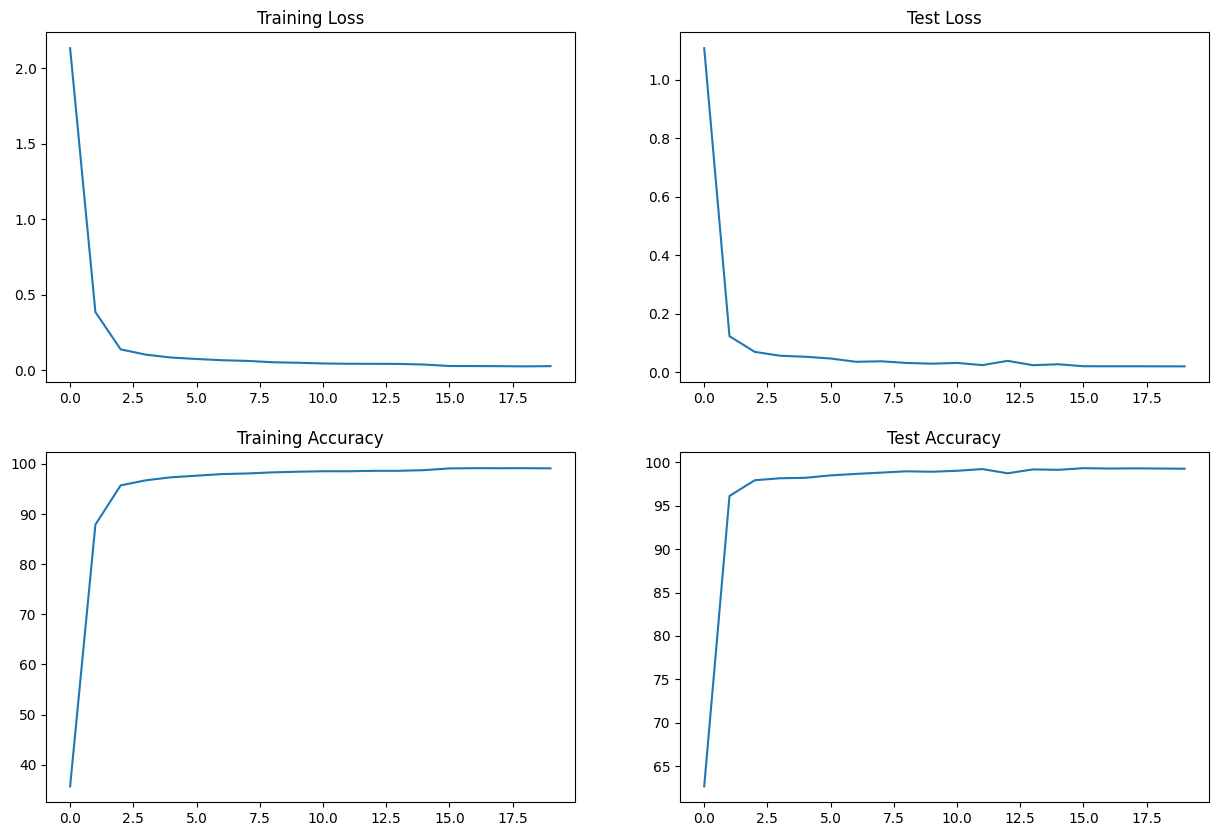

In [10]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")